# Getting smurf online again!
http://127.0.0.1:8000/tree?token=e2820f1b828c3614c5cb4001584cf70ea79fe63a1710c808

 
Alex & Hannah, 8/18/2025




In [1]:
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import yaml
import time
import pickle as pkl
import os
import sys
import numpy as np
from matplotlib import cm
from scipy.signal import butter, welch, filtfilt, periodogram, savgol_filter
import pandas as pd
import glob
from scipy.optimize import curve_fit
import scipy.linalg as linalg
import scipy as sp

plt.ion()
%matplotlib inline

SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE, family='serif')          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE, labelsize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE, facecolor='white') 

# Initialize a pysmurf control instance

In [2]:
import pysmurf.client
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from scipy.signal import butter, welch, filtfilt, periodogram, savgol_filter

import epics
import os
import time

%matplotlib inline

epics_prefix = "smurf_server_s4"
config_file  = "/usr/local/src/pysmurf/cfg_files/slab/experiment_b33_C03-A03-06_bfg_squats.cfg"
S = pysmurf.client.SmurfControl(epics_root=epics_prefix, cfg_file=config_file, setup=False, make_logfile=True)

## Dump versions of everything
# Python version
print (sys.version)
import pysmurf
pysmurf.__version__
cwd=os.getcwd()
os.chdir('/usr/local/src/pysmurf/')
#print(str(!git branch))
#print(!git rev-parse --short HEAD)
epics_prefix=f'smurf_server_s{S.slot_number}'
print(S._caget(f'{epics_prefix}:AMCc:RogueVersion', as_string=True))
print(S._caget(f'{epics_prefix}:AMCc:SmurfApplication:SmurfVersion', as_string=True))
print(S._caget(f'{epics_prefix}:AMCc:SmurfApplication:StartupArguments', as_string=True))
print(S.get_fpga_git_hash_short())
print(S.config.filename)

RuntimeError: epics failed to respond

In [4]:
S.log('starting')

In [5]:
import numpy as np
import matplotlib
matplotlib.use('module://matplotlib_inline.backend_inline')
import matplotlib.pylab as plt
from scipy.signal import butter, welch, filtfilt, periodogram, savgol_filter

#os.chdir('/usr/local/src/pysmurf/scratch/smithzj/')

def welch_IQ(iq, fs,  plot=True, welch_nperseg=2**18, title='', show_plot=True):
    i = iq.real
    q = iq.imag
    ffi, pxxi = welch(i,fs=fs, nperseg=welch_nperseg)
    ffq, pxxq = welch(q,fs=fs, nperseg=welch_nperseg)

    # scale to dBc/Hz by the voltage magnitude
    magfac = np.mean(q)**2 + np.mean(i)**2
    pxxi_dbc = 10. * np.log10(pxxi / magfac)
    pxxq_dbc = 10. * np.log10(pxxq / magfac)


    if plot:
        plt.gca().semilogx(ffi,pxxi_dbc,linestyle='-',label=f'i {title}')
        plt.gca().semilogx(ffq,pxxq_dbc, linestyle='--',label=f'q {title}')
        plt.ylabel('dBc/Hz')
        plt.xlabel('Frequency (Hz)')
        plt.title(title)
        plt.legend(loc='lower left')
        if show_plot: plt.show()
    return

def takeDebugData(S, band, channel, nsamp, plot=True, welch_nperseg=2**18, show_plot=True, channel_mode=0):
    timestamp = S.get_timestamp() 
    filename = f'{timestamp}_single_channel_b{band}ch{channel:03}'
    i,q,sync = S.take_debug_data(band=band,channel=channel,rf_iq=True,nsamp=nsamp,filename=filename, single_channel_readout=channel_mode) 
    i = i / (1.2)
    q = q / (-1.2)
    iq = i + 1j * q
    if plot: 
        fs = S.get_channel_frequency_mhz(band) * 1.0E6
        welch_IQ(iq, fs, welch_nperseg, title=filename, show_plot=show_plot)
        ### save plots 
        fig = plt.gcf()
        #plt.savefig(f'/data/smurf_data/mkid_1tone_streaming_metadata/_Figs/{filename}_psd', fmt='tiff')
        plt.show()
    return iq, sync, filename

In [6]:
S.log_file

'/data/smurf_data/20250909/1757446316/outputs/1757446316.log'

In [7]:
S.all_off()

In [8]:
## [HM] this is the band that we are actually using
S.set_band_center_mhz(band=0,val=595.2)

## [HM] these are dummy values. Just can't be in the baseband range??
S.set_band_center_mhz(band=1,val=4750)
S.set_band_center_mhz(band=2,val=5250)
S.set_band_center_mhz(band=3,val=5750)

# Through fridge
LO = 8.9GHz, 10dBm output



In [9]:
S.find_freq??

Signature:
S.find_freq(
    band,
    start_freq=-250,
    stop_freq=250,
    subband=None,
    tone_power=None,
    n_read=2,
    make_plot=False,
    save_plot=True,
    plotname_append='',
    window=50,
    rolling_med=True,
    make_subband_plot=False,
    show_plot=False,
    grad_cut=0.05,
    flip_phase=False,
    grad_kernel_width=8,
    amp_cut=0.25,
    pad=2,
    min_gap=2,
)
Source:   
    @set_action()
    def find_freq(self, band, start_freq=-250, stop_freq=250, subband=None,
            tone_power=None, n_read=2, make_plot=False, save_plot=True,
            plotname_append='', window=50, rolling_med=True,
            make_subband_plot=False, show_plot=False, grad_cut=.05,
            flip_phase=False, grad_kernel_width=8,
            amp_cut=.25, pad=2, min_gap=2):
        '''
        Finds the resonances in a band (and specified subbands)

        Args
        ----
        band : int
            The band to search.
        start_freq : float, optional, default -250
   

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


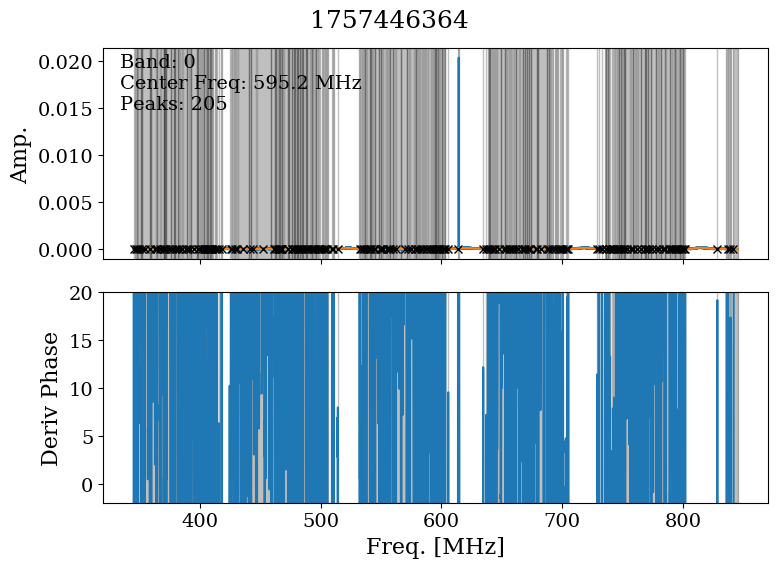

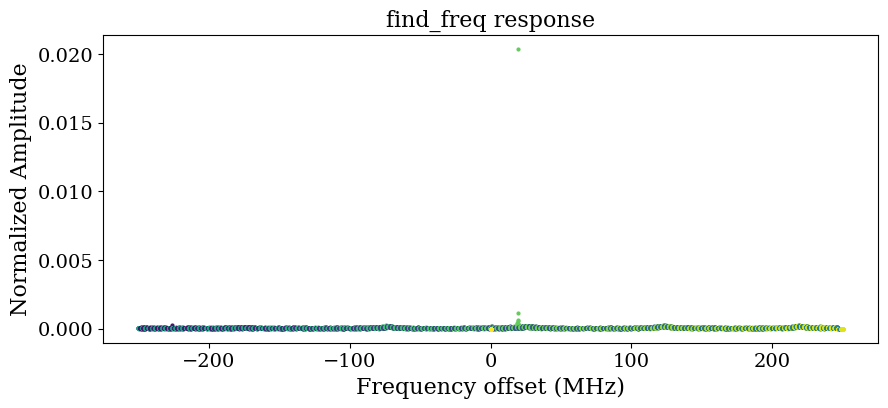

In [10]:
f, resp = S.find_freq(band=0,n_read=3, make_plot=True, show_plot=True)

# Look for the qubits

From today's VNA scans, H2 qubits should be located at:
* H2Q1 = 8365.5 MHz
* H2Q2 = 8418.1 MHz
* H2Q3 = 8470.5 MHz

In [17]:
relative_start = -110
relative_stop = -80

LO_freq = 8900
LO_power = 10

smurf_start = LO_freq - (595.2+relative_start)
smurf_stop = LO_freq - (595.2+relative_stop)
print(f"\nSMuRF start: {smurf_start} MHz")
print(f"SMuRF stop: {smurf_stop} MHz")
S.log('SMURF range is from {} to {} MHz'.format(smurf_start,smurf_stop))


SMuRF start: 8414.8 MHz
SMuRF stop: 8384.8 MHz


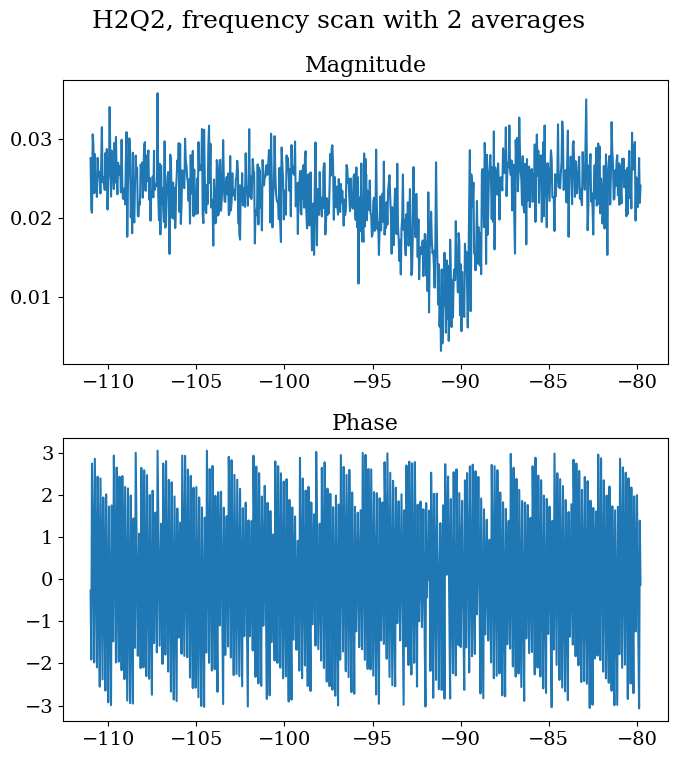

In [19]:
## now do the find freqs a bunch of times and average the results
n_avg = 2

f_all = []
mag_all = []
phase_all = []
for n in range(n_avg):
    f, resp = S.find_freq(band=0,n_read=2, make_plot=False, show_plot=False,
                          start_freq=relative_start, 
                          stop_freq=relative_stop)
    collapsed_f = f[np.abs(f)>0]
    collapsed_resp = resp[np.abs(f)>0]

    f_all.append(collapsed_f)
    mag_all.append(np.abs(collapsed_resp))
    phase_all.append(np.angle(collapsed_resp))

## average and plot the results
plt.figure(figsize=(7,8))
plt.subplot(2,1,1)
plt.plot(f_all[0], np.mean(mag_all, axis=0))
plt.title('Magnitude')
plt.subplot(2,1,2)
plt.plot(f_all[0], np.mean(phase_all, axis=0))
plt.title('Phase')
plt.suptitle(f'H2Q2, frequency scan with {n_avg} averages')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

Text(0.5, 0, 'Frequency (MHz) w.r.t bandcenter')

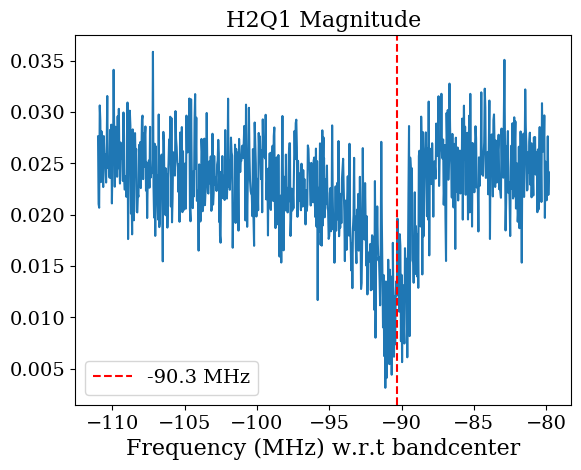

In [26]:
m1 = -90.3
m2 = -115
## average and plot the results
plt.plot(f_all[0], np.mean(mag_all, axis=0))
plt.axvline(x=m1, color='r', linestyle='--', label=f'{m1} MHz')
#plt.axvline(x=m2, color='orange', linestyle='--', label=f'{m2} MHz')
plt.title('H2Q1 Magnitude')
plt.legend()
plt.xlabel('Frequency (MHz) w.r.t bandcenter')

In [27]:
def takeDebugData(S, band, channel, nsamp, plot=True, welch_nperseg=2**18, show_plot=True, channel_mode=0):
    timestamp = S.get_timestamp() 
    filename = f'{timestamp}_single_channel_b{band}ch{channel:03}'
    i,q,sync = S.take_debug_data(band=band,channel=channel,rf_iq=True,nsamp=nsamp,filename=filename, single_channel_readout=channel_mode) 
    i = i / (1.2)
    q = q / (-1.2)
    iq = i + 1j * q
    if plot: 
        fs = S.get_channel_frequency_mhz(band) * 1.0E6
        welch_IQ(iq, fs, welch_nperseg, title=filename, show_plot=show_plot)
        ### save plots 
        fig = plt.gcf()
        #plt.savefig(f'/data/smurf_data/mkid_1tone_streaming_metadata/_Figs/{filename}_psd', fmt='tiff')
        plt.show()
    return iq, sync, filename

In [28]:
S.all_off()
S.log('trying to do a PSD thing')
amp_readout_freq = 595.2+m1
my_log = f'Sending fixed tone at {amp_readout_freq} MHz'
print(my_log)
S.log(my_log)

(band,channel)=S.set_fixed_tone(amp_readout_freq,12)

#S.run_serial_eta_scan(0)


Sending fixed tone at 504.90000000000003 MHz


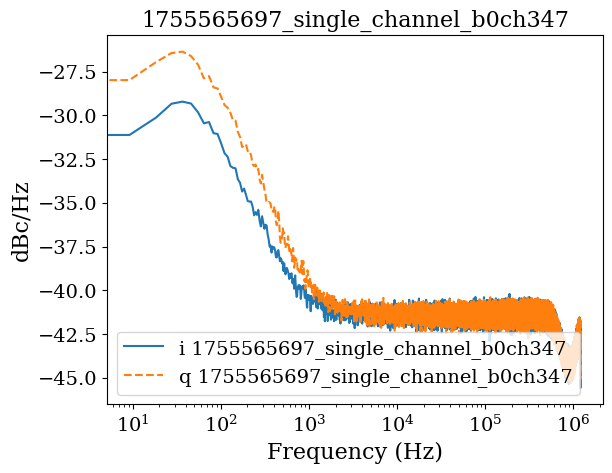

<Figure size 640x480 with 0 Axes>

In [32]:
iq, sync, filename = takeDebugData(S, band=band, channel=channel, nsamp=2**25, 
                                   plot=True, show_plot=True, channel_mode=2)


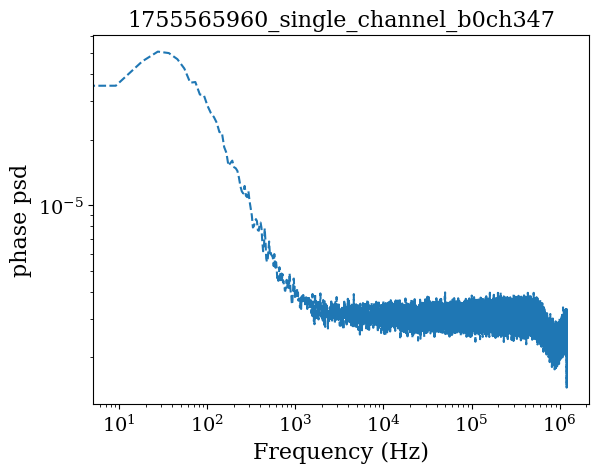

Text(0.5, 1.0, '1755565960_single_channel_b0ch347')

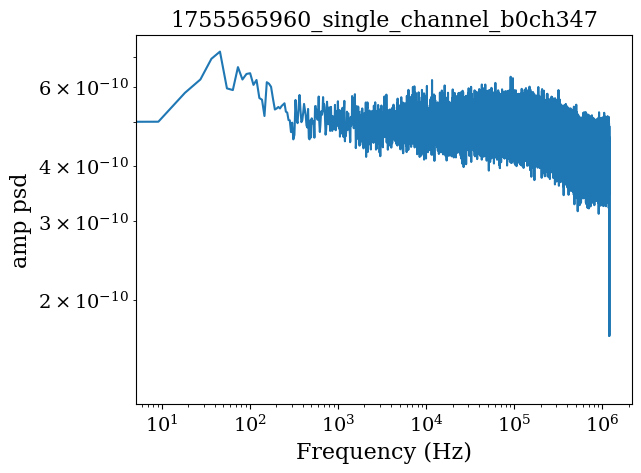

In [33]:
fs = S.get_channel_frequency_mhz(band) * 1.0E6

ffamp, pxxa = welch(np.abs(iq),fs=fs, nperseg=2**18)
ffphase, pxxph = welch(np.angle(iq),fs=fs, nperseg=2**18)



timestamp = S.get_timestamp() 
filename = f'{timestamp}_single_channel_b{band}ch{channel:03}'
plt.gca().loglog(ffphase,pxxph, linestyle='--',label=f'phase {filename}')
plt.ylabel('phase psd')
plt.xlabel('Frequency (Hz)')
plt.title(filename)
plt.show()

plt.gca().loglog(ffamp,pxxa,linestyle='-',label=f'amp {filename}')
plt.ylabel('amp psd')
plt.xlabel('Frequency (Hz)')
plt.title(filename)


In [39]:
curoff_hz = 500
order = 2

fs = S.get_channel_frequency_mhz(band) * 1.0E6

def butterworth_filter(data, fs, cutoff_hz=200, order=1):
    b, a = butter(N=order, Wn=cutoff_hz, btype='low', fs=fs)
    zi = sp.signal.lfilter_zi(b, a)
    filt_data, _ = sp.signal.lfilter(b, a, data, zi=zi*data[0])
    return filt_data

butter_ivals = butterworth_filter(cutoff_hz=curoff_hz, order=order, data=np.real(iq), fs=fs)
butter_qvals = butterworth_filter(cutoff_hz=curoff_hz, order=order, data=np.imag(iq), fs=fs)



Text(0.5, 0, 'Time [s]')

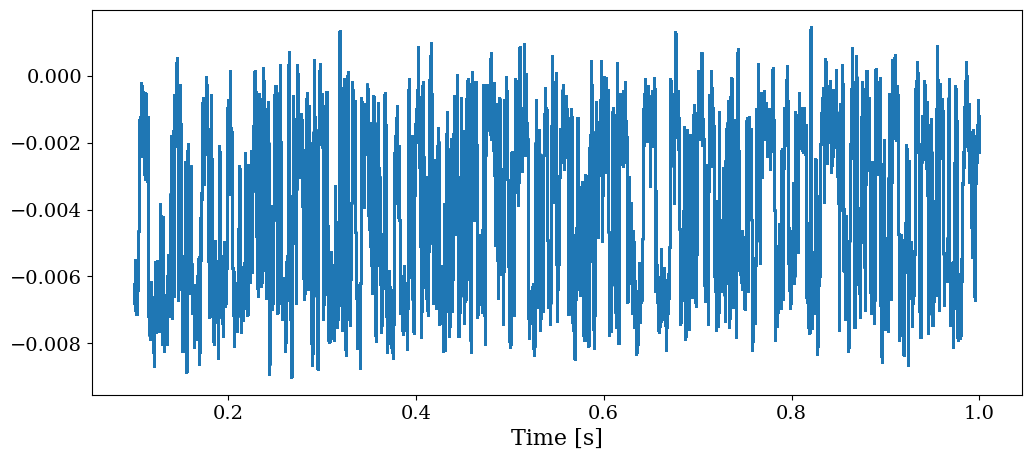

In [40]:
start_plot_time_s = 0.1
stop_plot_time_s = 1


## Find indices that best match times
times = np.arange(len(iq)) / fs
start_plot_idx = np.argmin(np.abs(times - start_plot_time_s))
stop_plot_idx = np.argmin(np.abs(times - stop_plot_time_s))

fig, ax = plt.subplots(1,1, figsize=(12,5))
ax.plot(times[start_plot_idx:stop_plot_idx], butter_qvals[start_plot_idx:stop_plot_idx], '.', label='I', markersize=2)
ax.set_xlabel('Time [s]')




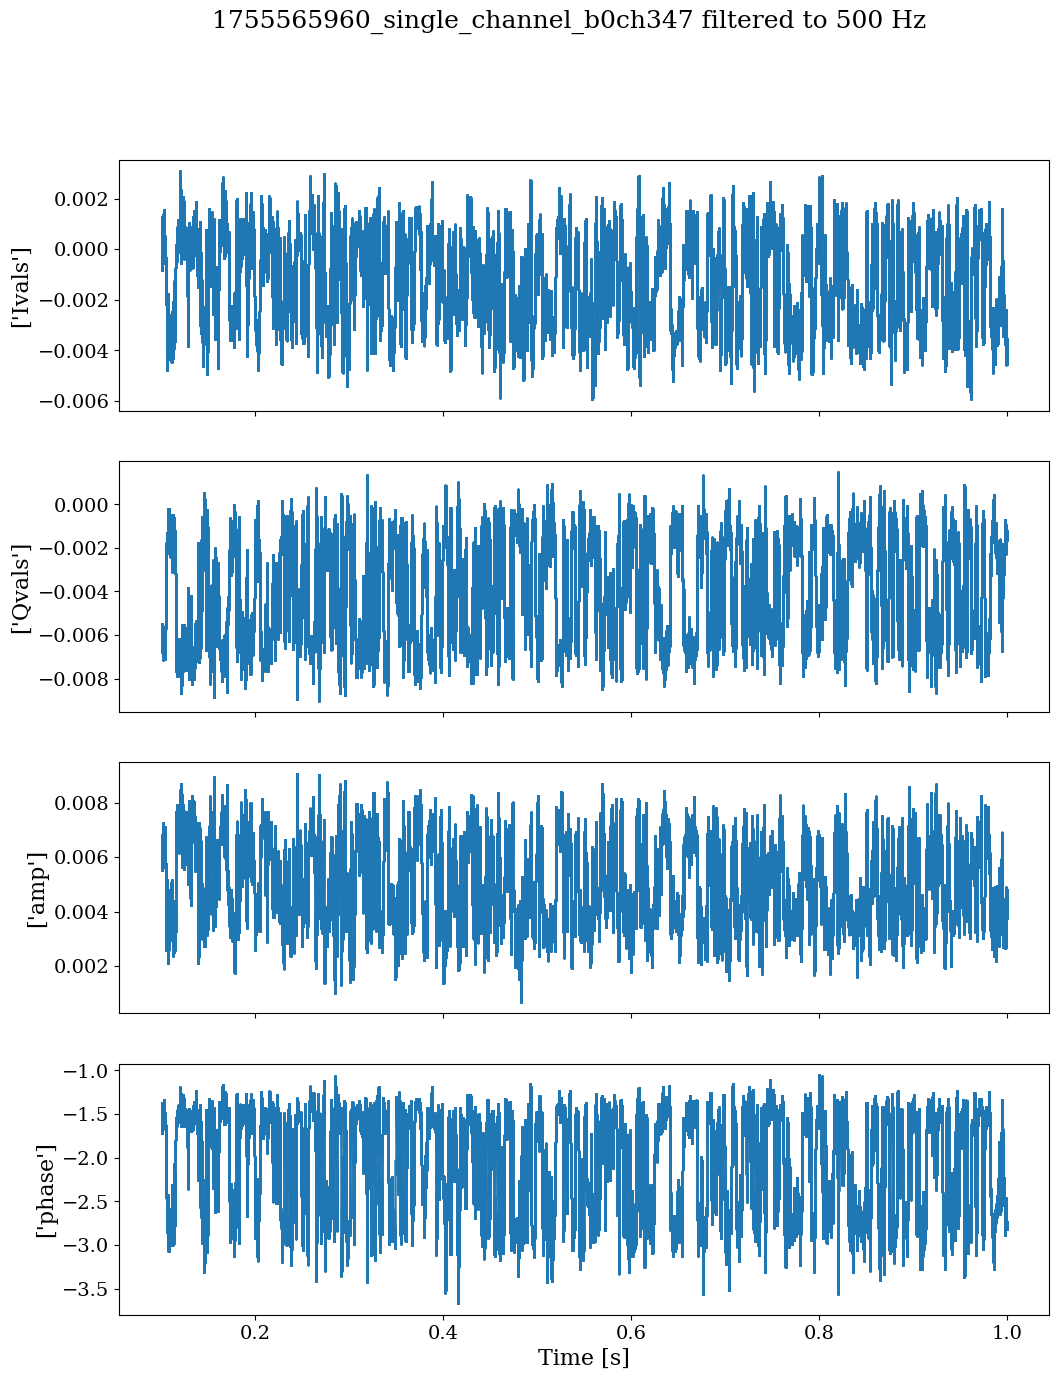

In [41]:
start_plot_time_s = 0.1
stop_plot_time_s = 1

## Find indices that best match times
times = np.arange(len(iq)) / fs
start_plot_idx = np.argmin(np.abs(times - start_plot_time_s))
stop_plot_idx = np.argmin(np.abs(times - stop_plot_time_s))

fig, ax = plt.subplots(4,1, figsize=(12,15), sharex=True)
ax[0].plot(times[start_plot_idx:stop_plot_idx], butter_ivals[start_plot_idx:stop_plot_idx], '.',label='I', markersize=0.4)
ax[0].set_ylabel(['Ivals'])

ax[1].plot(times[start_plot_idx:stop_plot_idx], butter_qvals[start_plot_idx:stop_plot_idx],'.', label='Q', markersize=0.4)
ax[1].set_ylabel(['Qvals'])

ax[2].plot(times[start_plot_idx:stop_plot_idx], np.abs(butter_ivals+1j*butter_qvals)[start_plot_idx:stop_plot_idx], '.', label='amp', markersize=0.4)
ax[2].set_ylabel(['amp'])

ax[3].plot(times[start_plot_idx:stop_plot_idx], np.unwrap(np.angle(butter_ivals+1j*butter_qvals)[start_plot_idx:stop_plot_idx]), '.', label='phase', markersize=0.4)
ax[3].set_ylabel(['phase'])
ax[3].set_xlabel('Time [s]')

fig.suptitle(f'{filename} filtered to {curoff_hz} Hz')

plt.show()

In [ ]:
plt.scatter(butter_ivals, butter_qvals)

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fb68fb92dc0> (for post_execute):


KeyboardInterrupt: 

# let's move the tone away from the SQUAT

In [4]:
m1 = -90.3

In [7]:
S.all_off()
S.log('trying to do a PSD thing')
amp_readout_freq = 595.2+m1-40
my_log = f'Sending fixed tone at {amp_readout_freq} MHz'
print(my_log)
S.log(my_log)

(band,channel)=S.set_fixed_tone(amp_readout_freq,12)


Sending fixed tone at 464.90000000000003 MHz


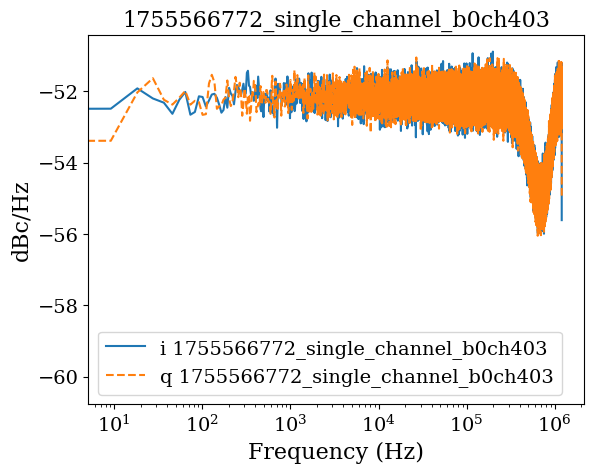

<Figure size 640x480 with 0 Axes>

In [8]:
iq, sync, filename = takeDebugData(S, band=band, channel=channel, nsamp=2**25, 
                                   plot=True, show_plot=True, channel_mode=2)

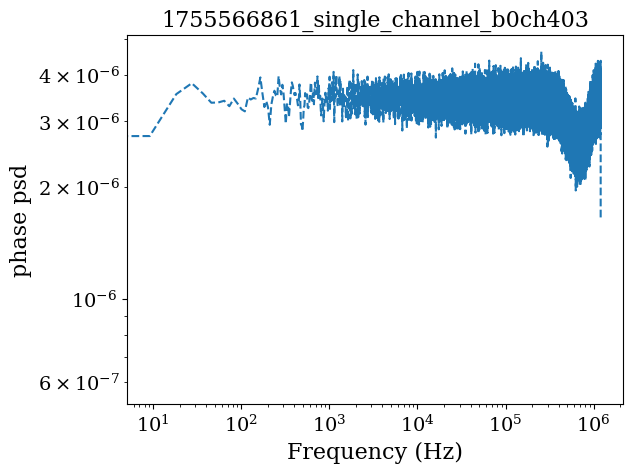

Text(0.5, 1.0, '1755566861_single_channel_b0ch403')

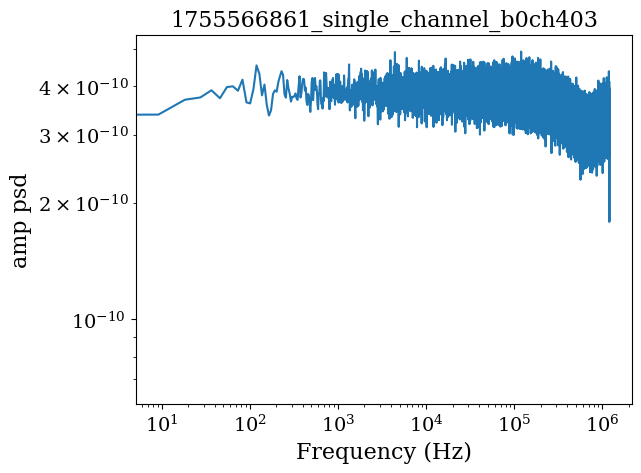

In [9]:
fs = S.get_channel_frequency_mhz(band) * 1.0E6

ffamp, pxxa = welch(np.abs(iq),fs=fs, nperseg=2**18)
ffphase, pxxph = welch(np.angle(iq),fs=fs, nperseg=2**18)



timestamp = S.get_timestamp() 
filename = f'{timestamp}_single_channel_b{band}ch{channel:03}'
plt.gca().loglog(ffphase,pxxph, linestyle='--',label=f'phase {filename}')
plt.ylabel('phase psd')
plt.xlabel('Frequency (Hz)')
plt.title(filename)
plt.show()

plt.gca().loglog(ffamp,pxxa,linestyle='-',label=f'amp {filename}')
plt.ylabel('amp psd')
plt.xlabel('Frequency (Hz)')
plt.title(filename)


In [11]:
curoff_hz = 500
order = 2

fs = S.get_channel_frequency_mhz(band) * 1.0E6

def butterworth_filter(data, fs, cutoff_hz=200, order=1):
    b, a = butter(N=order, Wn=cutoff_hz, btype='low', fs=fs)
    zi = sp.signal.lfilter_zi(b, a)
    filt_data, _ = sp.signal.lfilter(b, a, data, zi=zi*data[0])
    return filt_data

butter_ivals = butterworth_filter(cutoff_hz=curoff_hz, order=order, data=np.real(iq), fs=fs)
butter_qvals = butterworth_filter(cutoff_hz=curoff_hz, order=order, data=np.imag(iq), fs=fs)

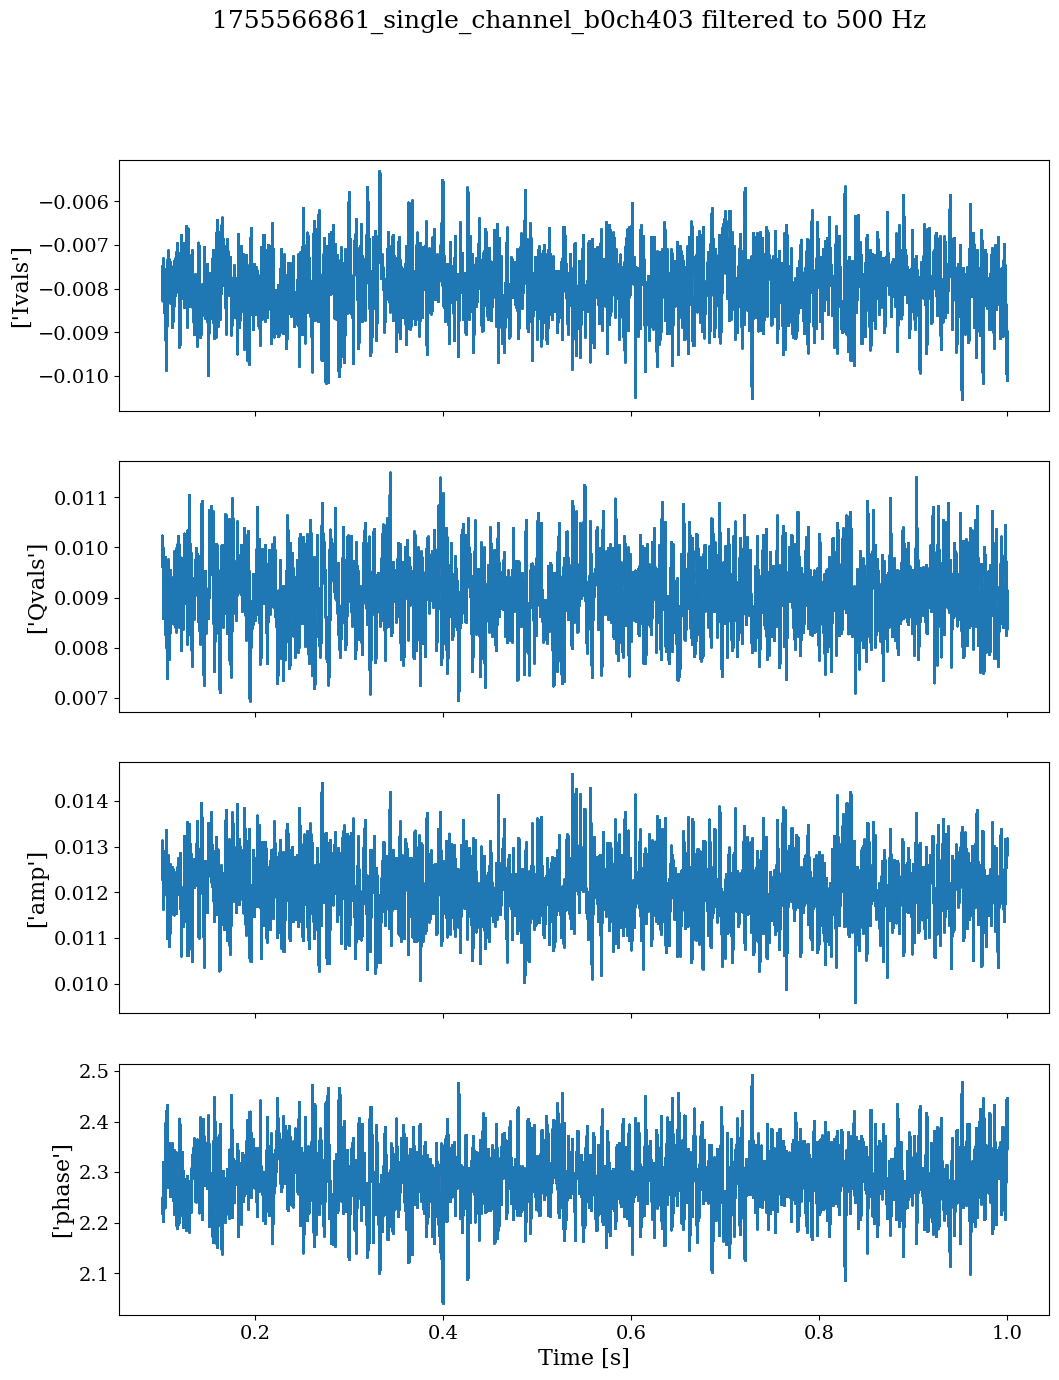

In [12]:
start_plot_time_s = 0.1
stop_plot_time_s = 1

## Find indices that best match times
times = np.arange(len(iq)) / fs
start_plot_idx = np.argmin(np.abs(times - start_plot_time_s))
stop_plot_idx = np.argmin(np.abs(times - stop_plot_time_s))

fig, ax = plt.subplots(4,1, figsize=(12,15), sharex=True)
ax[0].plot(times[start_plot_idx:stop_plot_idx], butter_ivals[start_plot_idx:stop_plot_idx], '.',label='I', markersize=0.4)
ax[0].set_ylabel(['Ivals'])

ax[1].plot(times[start_plot_idx:stop_plot_idx], butter_qvals[start_plot_idx:stop_plot_idx],'.', label='Q', markersize=0.4)
ax[1].set_ylabel(['Qvals'])

ax[2].plot(times[start_plot_idx:stop_plot_idx], np.abs(butter_ivals+1j*butter_qvals)[start_plot_idx:stop_plot_idx], '.', label='amp', markersize=0.4)
ax[2].set_ylabel(['amp'])

ax[3].plot(times[start_plot_idx:stop_plot_idx], np.unwrap(np.angle(butter_ivals+1j*butter_qvals)[start_plot_idx:stop_plot_idx]), '.', label='phase', markersize=0.4)
ax[3].set_ylabel(['phase'])
ax[3].set_xlabel('Time [s]')

fig.suptitle(f'{filename} filtered to {curoff_hz} Hz')

plt.show()